# **Task 1:**

British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day,
thousands of BA flights arrive to and depart from the UK, carrying customers
across the world. Whether it’s for holidays, work or any other reason, the
end-to-end process of scheduling, planning, boarding, fuelling, transporting,
landing, and continuously running flights on time, efficiently and with top-class
customer service is a huge task with many highly important responsibilities.
As a data scientist at BA, it will be your job to apply your analytical skills to
influence real life multi-million-pound decisions from day one, making a tangible
impact on the business as your recommendations, tools and models drive key
business decisions, reduce costs and increase revenue.
Customers who book a flight with BA will experience many interaction points with
the BA brand. Understanding a customer
'
s feelings, needs, and feedback is crucial
for any business, including BA.
This first task is focused on scraping and collecting customer feedback and
reviewing data from a third-party source and analysing this data to present any
insights you may uncover

**STEPS**
1. Importing the required libraries
2. Accessing the data and scraping the data
3. Data Preprocessing
4. Data Visualisation

# 1. **Importing the required libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import nltk
from wordcloud import WordCloud, STOPWORDS

# 2.  **Accessing the data and scraping it**

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100

feedbacks = []

for i in range(1, pages + 1):

  print(f'scrapping page {i}')


  # create url link to collect url from the jumble data
  url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

  # Collect HTML data from this page
  response = requests.get(url)


  #parse content
  content = response.content
  parsed_content = BeautifulSoup(content, 'html.parser')

  for parameter in parsed_content.find_all("div", {"class": "text_content"}):
    feedbacks.append(parameter.get_text())

  print(f'   ---> {len(feedbacks)} total feedbacks')

scrapping page 1
   ---> 100 total feedbacks
scrapping page 2
   ---> 200 total feedbacks
scrapping page 3
   ---> 300 total feedbacks
scrapping page 4
   ---> 400 total feedbacks
scrapping page 5
   ---> 500 total feedbacks
scrapping page 6
   ---> 600 total feedbacks
scrapping page 7
   ---> 700 total feedbacks
scrapping page 8
   ---> 800 total feedbacks
scrapping page 9
   ---> 900 total feedbacks
scrapping page 10
   ---> 1000 total feedbacks
scrapping page 11
   ---> 1100 total feedbacks
scrapping page 12
   ---> 1200 total feedbacks
scrapping page 13
   ---> 1300 total feedbacks
scrapping page 14
   ---> 1400 total feedbacks
scrapping page 15
   ---> 1500 total feedbacks
scrapping page 16
   ---> 1600 total feedbacks
scrapping page 17
   ---> 1700 total feedbacks
scrapping page 18
   ---> 1800 total feedbacks
scrapping page 19
   ---> 1900 total feedbacks
scrapping page 20
   ---> 2000 total feedbacks
scrapping page 21
   ---> 2100 total feedbacks
scrapping page 22
   ---> 2200 

In [ ]:
df = pd.DataFrame()
df["feedbacks"] = feedbacks
df.head()

,feedbacks
0,✅ Trip Verified | I'm so fraustrated. My fli...
1,✅ Trip Verified | We have sat on this plane fo...
2,Not Verified | British Airways stranding my w...
3,✅ Trip Verified | Although like many these d...
4,✅ Trip Verified | This flight was British Airw...


finally! Now i have my dataset for this task! The loops above collected 3000 reviews by iterating through the paginated pages on the website.

The next thing that i will be doing now is to clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df

,feedbacks
0,✅ Trip Verified | I'm so fraustrated. My fli...
1,✅ Trip Verified | We have sat on this plane fo...
2,Not Verified | British Airways stranding my w...
3,✅ Trip Verified | Although like many these d...
4,✅ Trip Verified | This flight was British Airw...
...,...
2995,"Where shall I start, 4 hours delay or the days..."
2996,This was my first time on a long haul flight w...
2997,I fly 95% for pleasure and often take advantag...
2998,Staff was helpful in both cities. The plane wa...


In [ ]:
df.feedbacks = df.feedbacks.str.split('|', expand=True)[1]

In [ ]:
df

,feedbacks
0,I'm so fraustrated. My flight was cancelled...
1,We have sat on this plane for an hour and for...
2,British Airways stranding my wife and I at H...
3,"Although like many these days, I avoid BA o..."
4,This flight was British Airways at its very b...
...,...
2995,None
2996,None
2997,None
2998,None


# 3. **Data preprocessing steps**:

    

          Cleaning the text

          Tokenization

          Enrichment – POS tagging

          Stopwords removal

          Obtaining the stem words

#  *Step 1: Cleaning the text*

In [ ]:
# Define a function to clean the text
def clean(feedback):
  # Removes all special characters and numericals leaving the alphabets
  feedback = re.sub('[^A-Za-z]+', ' ', str(feedback))
  return feedback

# Cleaning the text in the feedbacks column
df['Cleaned feedbacks'] = df['feedbacks'].apply(clean)
df.head()

,feedbacks,Cleaned feedbacks
0,I'm so fraustrated. My flight was cancelled...,I m so fraustrated My flight was cancelled la...
1,We have sat on this plane for an hour and for...,We have sat on this plane for an hour and for...
2,British Airways stranding my wife and I at H...,British Airways stranding my wife and I at He...
3,"Although like many these days, I avoid BA o...",Although like many these days I avoid BA on l...
4,This flight was British Airways at its very b...,This flight was British Airways at its very b...


# *Step 2: Tokenization*
okenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# *Step 3: Enrichment – POS tagging*
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# *Step 4: Stopwords removal*
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

# *Step 5: Obtaining the stem words*
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

 **NLTK is a leading platform for building Python programs to work with human language data.**






*It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along
with a suite of text processing libraries for classification, tokenization, stemming, tagging,
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries*

In [ ]:
"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned feedbacks'].apply(token_stop_pos)
df.head(10)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,feedbacks,Cleaned feedbacks,POS tagged
0,I'm so fraustrated. My flight was cancelled...,I m so fraustrated My flight was cancelled la...,"[(fraustrated, a), (flight, n), (cancelled, v)..."
1,We have sat on this plane for an hour and for...,We have sat on this plane for an hour and for...,"[(sat, v), (plane, n), (hour, n), (forty, n), ..."
2,British Airways stranding my wife and I at H...,British Airways stranding my wife and I at He...,"[(British, a), (Airways, n), (stranding, v), (..."
3,"Although like many these days, I avoid BA o...",Although like many these days I avoid BA on l...,"[(Although, None), (like, None), (many, a), (d..."
4,This flight was British Airways at its very b...,This flight was British Airways at its very b...,"[(flight, n), (British, a), (Airways, n), (bes..."
5,The worst airline I have ever flown with. The...,The worst airline I have ever flown with They...,"[(worst, a), (airline, n), (ever, r), (flown, ..."
6,"Disappointing service, plane interior and t...",Disappointing service plane interior and terr...,"[(Disappointing, n), (service, n), (plane, n),..."
7,A transit visa is required for my partner t...,A transit visa is required for my partner to ...,"[(transit, n), (visa, n), (required, v), (part..."
8,I was surprised to receive confirmation pre...,I was surprised to receive confirmation pre f...,"[(surprised, v), (receive, v), (confirmation, ..."
9,"Flight cancelled, not refunding our money s...",Flight cancelled not refunding our money sayi...,"[(Flight, n), (cancelled, v), (refunding, v), ..."


In [ ]:
# Obtaining the stem words – Lemmatization
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,feedbacks,Cleaned feedbacks,POS tagged,Lemma
0,I'm so fraustrated. My flight was cancelled...,I m so fraustrated My flight was cancelled la...,"[(fraustrated, a), (flight, n), (cancelled, v)...",fraustrated flight cancel last minute end wo...
1,We have sat on this plane for an hour and for...,We have sat on this plane for an hour and for...,"[(sat, v), (plane, n), (hour, n), (forty, n), ...",sit plane hour forty five minute await takeo...
2,British Airways stranding my wife and I at H...,British Airways stranding my wife and I at He...,"[(British, a), (Airways, n), (stranding, v), (...",British Airways strand wife Heathrow Airport...
3,"Although like many these days, I avoid BA o...",Although like many these days I avoid BA on l...,"[(Although, None), (like, None), (many, a), (d...",Although like many day avoid BA long haul Lo...
4,This flight was British Airways at its very b...,This flight was British Airways at its very b...,"[(flight, n), (British, a), (Airways, n), (bes...",flight British Airways best flight attendant...


In [ ]:
df[['feedbacks','Lemma']]

,feedbacks,Lemma
0,I'm so fraustrated. My flight was cancelled...,fraustrated flight cancel last minute end wo...
1,We have sat on this plane for an hour and for...,sit plane hour forty five minute await takeo...
2,British Airways stranding my wife and I at H...,British Airways strand wife Heathrow Airport...
3,"Although like many these days, I avoid BA o...",Although like many day avoid BA long haul Lo...
4,This flight was British Airways at its very b...,flight British Airways best flight attendant...
...,...,...
2995,None,None
2996,None,None
2997,None,None
2998,None,None


#Sentiment Analysis using VADER

*VADER stands for Valence Aware Dictionary and Sentiment Reasoner*

*Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.*

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,feedbacks,Cleaned feedbacks,POS tagged,Lemma,Sentiment,Analysis
0,I'm so fraustrated. My flight was cancelled...,I m so fraustrated My flight was cancelled la...,"[(fraustrated, a), (flight, n), (cancelled, v)...",fraustrated flight cancel last minute end wo...,-0.8729,Negative
1,We have sat on this plane for an hour and for...,We have sat on this plane for an hour and for...,"[(sat, v), (plane, n), (hour, n), (forty, n), ...",sit plane hour forty five minute await takeo...,0.1779,Neutral
2,British Airways stranding my wife and I at H...,British Airways stranding my wife and I at He...,"[(British, a), (Airways, n), (stranding, v), (...",British Airways strand wife Heathrow Airport...,-0.5719,Negative
3,"Although like many these days, I avoid BA o...",Although like many these days I avoid BA on l...,"[(Although, None), (like, None), (many, a), (d...",Although like many day avoid BA long haul Lo...,-0.7584,Negative
4,This flight was British Airways at its very b...,This flight was British Airways at its very b...,"[(flight, n), (British, a), (Airways, n), (bes...",flight British Airways best flight attendant...,0.9814,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,1204
Negative,902
Neutral,894


# 4. **Data Visualisation**

([<matplotlib.patches.Wedge at 0x7a539da07010>,
 [Text(0.3355335748743442, 1.0475768325674462, 'Positive'),
  Text(-1.0425452610843717, -0.350855210294103, 'Negative'),
  Text(0.8003566803454518, -1.0871656654928028, 'Neutral')],
 [Text(0.18301831356782408, 0.5714055450367888, '40.1%'),
  Text(-0.5686610515005663, -0.19137556925132887, '30.1%'),
  Text(0.5039282802175066, -0.6845117153102831, '29.8%')])

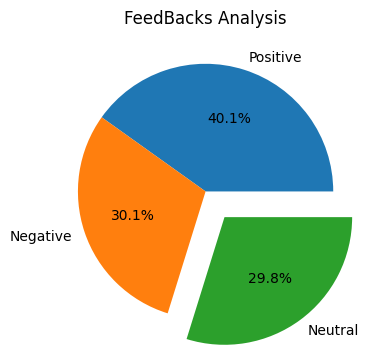

In [ ]:
%matplotlib inline
plt.figure(figsize=(14,5))

plt.subplot(1,3,2)
plt.title("FeedBacks Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

# **Comment**

The sentiment analysis reveals a generally favorable response, with 40.1% of the feedback being positive. However, the 30.1% negative sentiment highlights some key areas where improvements are needed to enhance customer satisfaction. Additionally, the 11.5% neutral feedback provides an opportunity to extract objective insights or suggestions for growth. A closer examination of the negative feedback will help address specific issues, while leveraging positive reviews can strengthen the company's image..

In [ ]:
#converting our Data to CSV file
df.to_csv("BA_Feedbacks.csv")

# **Wordcloud**

we are going to be working with word Cloud or Tag Clouds technique so as to visualise the texts or keywords that are natively used from the websites

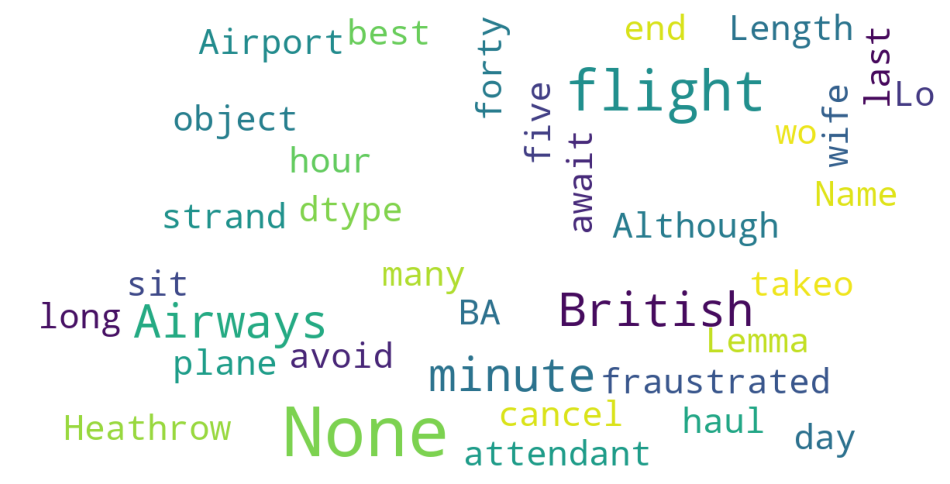

In [ ]:
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)